        product_name  total_profit
0    Air Conditioner       29940.0
8              Phone       23450.0
6             Laptop       21200.0
9       Smart TV 55"       19176.0
2   Electric Scooter       15705.0
11   Washing Machine       15548.0
4     Gaming Console        8931.0
1     Coffee Machine        6129.5
10    Vacuum Cleaner        5913.0
5      Kitchen Mixer        5421.0
3    Electric Shaver        2430.0
12  Wireless Speaker        2371.2
7     Microwave Oven        2070.0


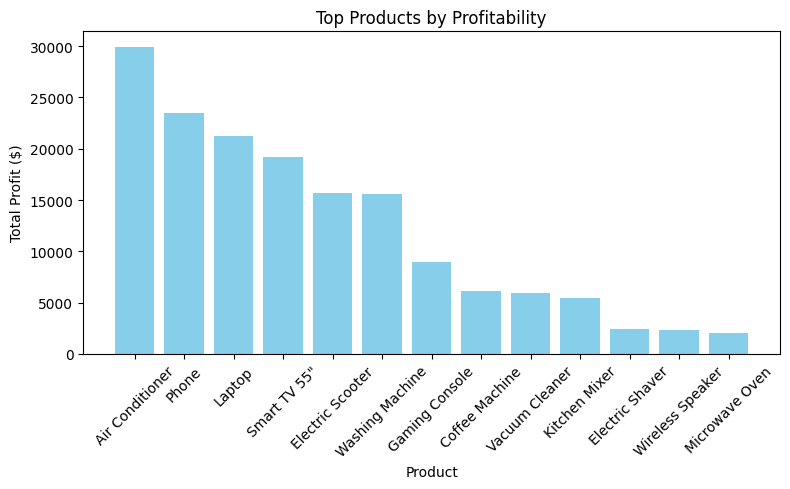

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# -----------------------------
# Paths
# -----------------------------
BASE_DIR = Path.cwd().parent
DATA_DIR = BASE_DIR / "data"

# -----------------------------
# Load data
# -----------------------------

products = pd.read_csv(DATA_DIR / "products.csv")
sales = pd.read_csv(DATA_DIR / "sales.csv", parse_dates=["sale_date"])

# -----------------------------
# Put tables in data frames
# -----------------------------

products = pd.DataFrame(products)

sales = pd.DataFrame(sales)

# -----------------------------
# Calculate Profit Margin
# -----------------------------
products["profit_margin"] = products["price"] - products["cost_price"]

# -----------------------------
# Merge Sales with Products
# -----------------------------
sales_profit = sales.merge(products, on="product_id", how="left")

# -----------------------------
# Compute Total Profit
# -----------------------------
sales_profit["total_profit"] = sales_profit["profit_margin"] * sales_profit["quantity"]

# -----------------------------
# Aggregate Profit by Product
# -----------------------------
profit_by_product = (
    sales_profit.groupby("product_name")["total_profit"]
    .sum()
    .reset_index()
    .sort_values(by="total_profit", ascending=False)
)

print(profit_by_product)

# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(8, 5))
plt.bar(profit_by_product["product_name"], profit_by_product["total_profit"], color="skyblue")
plt.title("Top Products by Profitability")
plt.xlabel("Product")
plt.ylabel("Total Profit ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()